In [224]:
# import sys
# !{sys.executable} -m pip install scipy

import csv
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, optimize, interpolate
from scipy.signal import argrelextrema
from scipy.optimize import fsolve
from scipy.integrate import odeint
from scipy.integrate import solve_bvp
from scipy.linalg import solve_banded
import time
start_time = time.time()
# main()
plt.rcParams.update({'font.size': 11})

In [225]:
def csv_to_column(filepath, col, dt):
    results = []
    column = []
    with open(str(filepath)) as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
        # print(row)
        for row in reader: # each row is a list
            results.append(row)
            # print(row)
        for i in range(len(results)):
            column.append(results[i][col])
            i=i+1
        column = np.array(column[1:])
        column = column/(380e6*0.9850526315789474*1.0000267151100664)
        column = column[0:-3]
        
        # print(column)

        # tfs = argrelextrema(column, np.greater)
        # fs = column[tfs]
        # print(tfs)

        print(str(filepath)[-10::], ": relative fs is", np.amax(column), " at t=", np.where(column==np.amax(column))[0][0]*dt/4.97)
        return np.linspace(0,len(column)*dt,len(column)), column, np.amax(column), np.where(column==np.amax(column))[0][0]*dt, str(filepath)[-10:-6]+'K, '+str(filepath)[-6:-4]+'% initial porosity', str(filepath)[-10:-6]+str(filepath)[-6:-4]

117309.csv : relative fs is 0.9999732856036117  at t= 1.0
117330.csv : relative fs is 0.9999732856036117  at t= 1.0
117360.csv : relative fs is 0.9999732856036117  at t= 1.0
117395.csv : relative fs is 0.9999732856036117  at t= 1.0
122309.csv : relative fs is 0.9999732856036117  at t= 1.0
122330.csv : relative fs is 0.9999999999999999  at t= 1.0040241448692153
122360.csv : relative fs is 0.9999999999999999  at t= 1.0040241448692153
122395.csv : relative fs is 0.9922528250474179  at t= 1.0543259557344065
127309.csv : relative fs is 0.9999999999999999  at t= 1.0040241448692153
127330.csv : relative fs is 0.9774263350519593  at t= 1.062374245472837
127360.csv : relative fs is 0.8195976811903933  at t= 1.2354124748490947
127395.csv : relative fs is 0.5148665615900407  at t= 1.4104627766599598


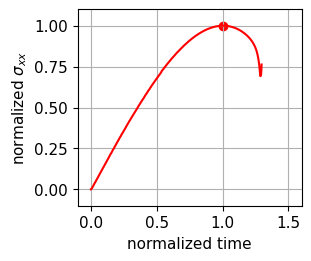

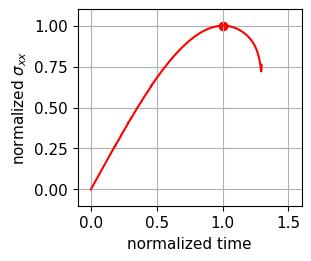

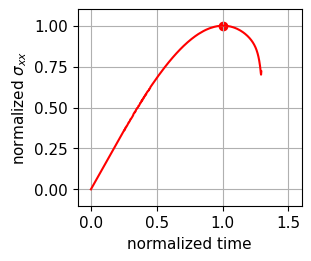

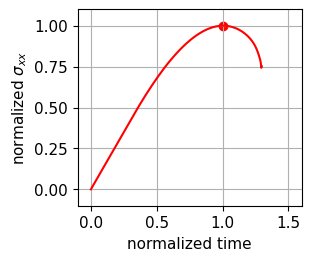

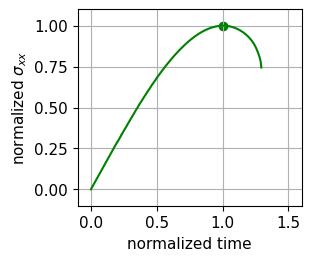

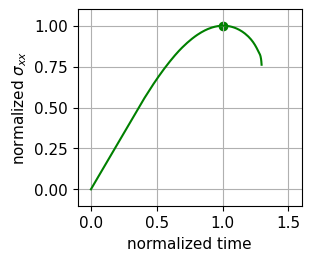

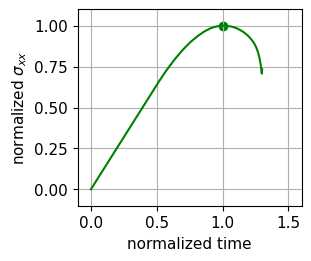

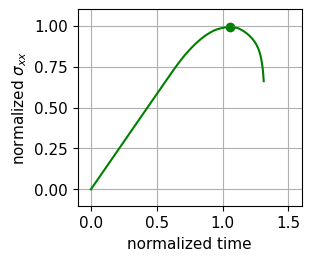

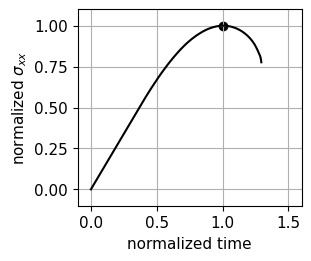

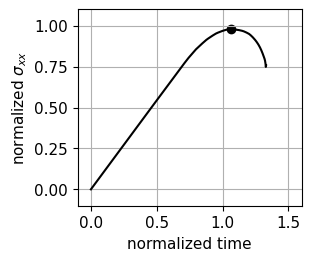

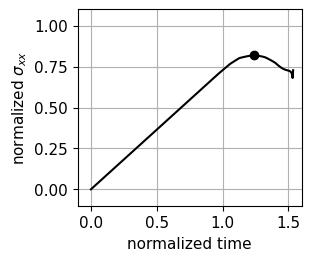

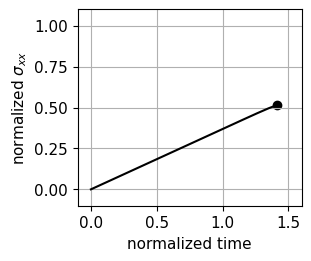

In [227]:
files = np.array([
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/117309.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/117330.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/117360.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/117395.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/122309.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/122330.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/122360.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/122395.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/127309.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/127330.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/127360.csv",
    "/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/127395.csv"
])
for i in range(len(files)):
    a = csv_to_column(files[i], 26, 0.01)
    fig, ax = plt.subplots(figsize = (3,2.5), layout='constrained')
    if "1173" in files[i]:
        plt.plot(a[0]/4.97,a[1],color='red')
        plt.scatter(a[3]/4.97, a[2], color='red')
        # plt.scatter(a[3], a[2], color='black', label=a[4])
    if "1223" in files[i]:
        plt.plot(a[0]/4.97,a[1],color='green')
        plt.scatter(a[3]/4.97, a[2], color='green')
        # plt.scatter(a[3], a[2], color='red', label=a[4])
    if "1273" in files[i]:
        plt.plot(a[0]/4.97,a[1],color='black')
        plt.scatter(a[3]/4.97, a[2], color='black')
        # plt.scatter(a[3], a[2], color='blue', label=a[4])
    
    plt.grid(True)
    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.xticks([0, 0.5, 1, 1.5])
    plt.xlim([-0.1, 1.6])
    plt.ylim([-0.1,1.1])
    plt.xlabel('normalized time')
    plt.ylabel(r'normalized $\sigma_{xx}$')
    i = i+1
    
    plt.savefig('/Users/jjmarzia/Desktop/cvisim/test/test4/FLEXURAL/'+a[5]+'.svg', dpi=220,bbox_inches='tight')
    # plt.savefig('/Users/jjmarzia/Desktop/cvisim/test/test4/DAMAGE/XIVAL.pdf', dpi=220,bbox_inches='tight')

    # plt.savefig('/Users/jjmarzia/Downloads/XIVAL.svg', dpi=220,bbox_inches='tight')
    # plt.savefig('/Users/jjmarzia/Downloads/XIVAL.pdf', dpi=220,bbox_inches='tight')




